In [1]:
from flask import Blueprint
import numpy as np
import pandas as pd
import pickle
import copy
from sklearn.preprocessing import MinMaxScaler
import requests
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
from pandas import Series
from numpy import nan
import copy
import math
start = datetime.datetime(2013,1,1)
end = datetime.datetime(2022,2,24)

In [2]:
y_code = "BTC-USD"
y = web.DataReader(y_code,'yahoo',start,end)

<AxesSubplot:xlabel='Date'>

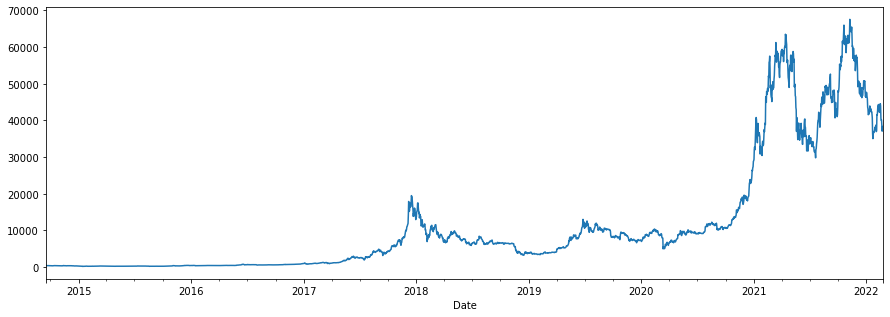

In [3]:
y["Close"].plot(figsize=(15,5))

In [10]:
data = y[['High','Low','Volume','Close',]]
data

,High,Low,Volume,Close
Date,,,,
2014-09-17,468.174011,452.421997,21056800,457.334015
2014-09-18,456.859985,413.104004,34483200,424.440002
2014-09-19,427.834991,384.532013,37919700,394.795990
2014-09-20,423.295990,389.882996,36863600,408.903992
2014-09-21,412.425995,393.181000,26580100,398.821014
...,...,...,...,...
2022-02-20,40119.890625,38112.812500,18340576452,38431.378906
2022-02-21,39394.437500,36950.476562,29280402798,37075.281250
2022-02-22,38359.855469,36488.933594,25493150450,38286.027344


In [16]:
time_lag = 365
full_dataset = copy.deepcopy(data)
for i in range(1,time_lag):
    temp = data.shift(periods=i)
    temp.columns = temp.columns + f'-{i}'
    full_dataset = pd.concat([full_dataset,temp],axis=1)

full_dataset = full_dataset.dropna()
full_dataset.drop(['High','Low','Volume',],axis=1,inplace=True)
full_dataset

,Close,High-1,Low-1,Volume-1,Close-1,High-2,Low-2,Volume-2,Close-2,High-3,...,Volume-362,Close-362,High-363,Low-363,Volume-363,Close-363,High-364,Low-364,Volume-364,Close-364
Date,,,,,,,,,,,,,,,,,,,,,
2015-09-16,229.091003,259.182007,229.822006,1.917780e+07,230.304001,232.440002,227.960999,2.099780e+07,230.643997,235.934998,...,3.791970e+07,394.795990,456.859985,413.104004,3.448320e+07,424.440002,468.174011,452.421997,2.105680e+07,457.334015
2015-09-17,229.809998,231.214996,227.401993,2.014420e+07,229.091003,259.182007,229.822006,1.917780e+07,230.304001,232.440002,...,3.686360e+07,408.903992,427.834991,384.532013,3.791970e+07,394.795990,456.859985,413.104004,3.448320e+07,424.440002
2015-09-18,232.975006,230.285004,228.925995,1.893540e+07,229.809998,231.214996,227.401993,2.014420e+07,229.091003,259.182007,...,2.658010e+07,398.821014,423.295990,389.882996,3.686360e+07,408.903992,427.834991,384.532013,3.791970e+07,394.795990
2015-09-19,231.492996,234.352997,232.184998,2.024220e+07,232.975006,230.285004,228.925995,1.893540e+07,229.809998,231.214996,...,2.412760e+07,402.152008,412.425995,393.181000,2.658010e+07,398.821014,423.295990,389.882996,3.686360e+07,408.903992
2015-09-20,231.212006,233.205002,231.089005,1.271260e+07,231.492996,234.352997,232.184998,2.024220e+07,232.975006,230.285004,...,4.509950e+07,435.790985,406.915985,397.130005,2.412760e+07,402.152008,412.425995,393.181000,2.658010e+07,398.821014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-20,38431.378906,40418.878906,39713.058594,1.373656e+10,40122.156250,40929.152344,39637.617188,2.331001e+10,40030.976562,44132.972656,...,1.061025e+11,48824.425781,57533.390625,48967.566406,9.205242e+10,54207.320312,58330.570312,55672.609375,5.189759e+10,57539.945312
2022-02-21,37075.281250,40119.890625,38112.812500,1.834058e+10,38431.378906,40418.878906,39713.058594,1.373656e+10,40122.156250,40929.152344,...,6.369552e+10,49705.332031,54204.929688,45290.589844,1.061025e+11,48824.425781,57533.390625,48967.566406,9.205242e+10,54207.320312
2022-02-22,38286.027344,39394.437500,36950.476562,2.928040e+10,37075.281250,40119.890625,38112.812500,1.834058e+10,38431.378906,40418.878906,...,5.450657e+10,47093.851562,51290.136719,47213.500000,6.369552e+10,49705.332031,54204.929688,45290.589844,1.061025e+11,48824.425781


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRegressor
from hyperopt import fmin, tpe, hp, Trials, space_eval, STATUS_OK
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [18]:
trainset, testset = train_test_split(full_dataset,test_size=0.2,shuffle=False)

In [19]:
trainset.head()

,Close,High-1,Low-1,Volume-1,Close-1,High-2,Low-2,Volume-2,Close-2,High-3,...,Volume-362,Close-362,High-363,Low-363,Volume-363,Close-363,High-364,Low-364,Volume-364,Close-364
Date,,,,,,,,,,,,,,,,,,,,,
2015-09-16,229.091003,259.182007,229.822006,19177800.0,230.304001,232.440002,227.960999,20997800.0,230.643997,235.934998,...,37919700.0,394.795990,456.859985,413.104004,34483200.0,424.440002,468.174011,452.421997,21056800.0,457.334015
2015-09-17,229.809998,231.214996,227.401993,20144200.0,229.091003,259.182007,229.822006,19177800.0,230.304001,232.440002,...,36863600.0,408.903992,427.834991,384.532013,37919700.0,394.795990,456.859985,413.104004,34483200.0,424.440002
2015-09-18,232.975006,230.285004,228.925995,18935400.0,229.809998,231.214996,227.401993,20144200.0,229.091003,259.182007,...,26580100.0,398.821014,423.295990,389.882996,36863600.0,408.903992,427.834991,384.532013,37919700.0,394.795990
2015-09-19,231.492996,234.352997,232.184998,20242200.0,232.975006,230.285004,228.925995,18935400.0,229.809998,231.214996,...,24127600.0,402.152008,412.425995,393.181000,26580100.0,398.821014,423.295990,389.882996,36863600.0,408.903992
2015-09-20,231.212006,233.205002,231.089005,12712600.0,231.492996,234.352997,232.184998,20242200.0,232.975006,230.285004,...,45099500.0,435.790985,406.915985,397.130005,24127600.0,402.152008,412.425995,393.181000,26580100.0,398.821014


In [20]:
testset.head()

,Close,High-1,Low-1,Volume-1,Close-1,High-2,Low-2,Volume-2,Close-2,High-3,...,Volume-362,Close-362,High-363,Low-363,Volume-363,Close-363,High-364,Low-364,Volume-364,Close-364
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-11,15701.339844,15450.329102,15124.959961,2.557494e+10,15290.902344,15785.136719,14865.529297,3.414912e+10,15332.315430,15637.320312,...,2.179686e+10,8491.992188,8826.943359,8692.551758,1.908474e+10,8708.094727,8836.841797,8761.651367,1.754576e+10,8808.262695
2020-11-12,16276.343750,15916.260742,15290.006836,2.977237e+10,15701.339844,15450.329102,15124.959961,2.557494e+10,15290.902344,15785.136719,...,1.649539e+10,8550.760742,8730.873047,8484.843750,2.179686e+10,8491.992188,8826.943359,8692.551758,1.908474e+10,8708.094727
2020-11-13,16317.808594,16305.003906,15534.771484,3.417576e+10,16276.343750,15916.260742,15290.006836,2.977237e+10,15701.339844,15450.329102,...,1.866864e+10,8577.975586,8591.997070,8473.973633,1.649539e+10,8550.760742,8730.873047,8484.843750,2.179686e+10,8491.992188
2020-11-14,16068.138672,16463.177734,15992.152344,3.159949e+10,16317.808594,16305.003906,15534.771484,3.417576e+10,16276.343750,15916.260742,...,2.157947e+10,8309.286133,8727.789062,8500.967773,1.866864e+10,8577.975586,8591.997070,8473.973633,1.649539e+10,8550.760742
2020-11-15,15955.587891,16317.808594,15749.193359,2.748171e+10,16068.138672,16463.177734,15992.152344,3.159949e+10,16317.808594,16305.003906,...,2.108361e+10,8206.145508,8653.280273,8273.573242,2.157947e+10,8309.286133,8727.789062,8500.967773,1.866864e+10,8577.975586


In [21]:
X = trainset.values[:,:-1]
y = trainset.values[:,-1]

X_test = testset.values[:,:-1]
y_test = testset.values[:,-1]

In [24]:
xgb=XGBRegressor()
xgb.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [25]:
y_pred_train = xgb.predict(X)
y_pred = xgb.predict(X_test)